In [1]:
# preparing the notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
avocado = pd.read_csv('/Users/admin/Documents/Kira/DataScience/Avocado2/avocado/data/avocado.csv')

# Data preparation

In [2]:
# reducing the non-necessary columns
average_price = avocado.loc[:,['Date', 'AveragePrice','type']]
average_price.head()

,Date,AveragePrice,type
0,2015-12-27,1.33,conventional
1,2015-12-20,1.35,conventional
2,2015-12-13,0.93,conventional
3,2015-12-06,1.08,conventional
4,2015-11-29,1.28,conventional


In [3]:
average_price['Date'] = pd.to_datetime(average_price['Date'])

# Analysis
## Price development


The questions to be answered are how the prices for avocados in general develop and how they develop during a single year.

In [4]:
# assigning the month
average_price['month'] = average_price['Date'].dt.month
average_price.head()

,Date,AveragePrice,type,month
0,2015-12-27,1.33,conventional,12
1,2015-12-20,1.35,conventional,12
2,2015-12-13,0.93,conventional,12
3,2015-12-06,1.08,conventional,12
4,2015-11-29,1.28,conventional,11


In [5]:
# assigning the year
average_price['year'] = average_price['Date'].dt.year
average_price.head()

,Date,AveragePrice,type,month,year
0,2015-12-27,1.33,conventional,12,2015
1,2015-12-20,1.35,conventional,12,2015
2,2015-12-13,0.93,conventional,12,2015
3,2015-12-06,1.08,conventional,12,2015
4,2015-11-29,1.28,conventional,11,2015


In [6]:
average_price_limited = average_price.loc[:,['Date','AveragePrice', 'type']]

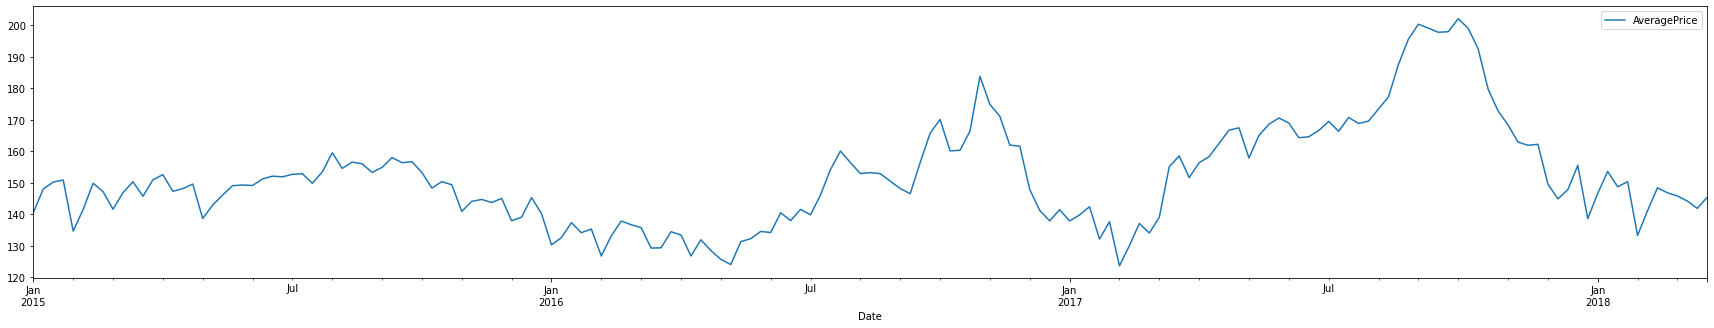

In [7]:
average_price_limited.groupby('Date').aggregate(sum).plot(figsize=(30,5));

I see a high variability for avocado prices with peaks around end of 2016 and 2017. **TO DO**: I will apply a trendline to verify the overall trend. We furthermore should distinguish between organic and conventional avocaods.

### Separate price development organic/conventational

In [8]:
# selecting organic values
average_price_organic = average_price_limited[average_price_limited['type'] == 'organic']
average_price_organic = average_price_organic.rename(columns = {'AveragePrice':'OrganicPrice'}).copy()

In [9]:
# selecting conventional values
average_price_conventional = average_price_limited[average_price_limited['type'] == 'conventional']
average_price_conventional = average_price_conventional.rename(columns = {'AveragePrice':'ConventionalPrice'}).copy()

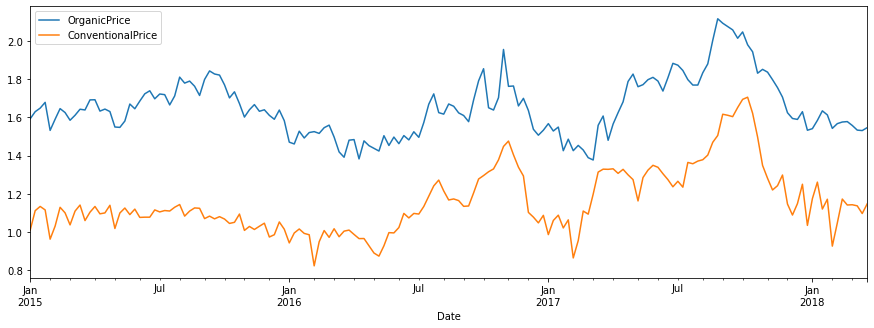

In [10]:
ax = average_price_organic.groupby('Date').aggregate('mean').plot()
average_price_conventional.groupby('Date').aggregate('mean').plot(ax = ax, figsize=(15,5) );

**TO DO** Apply trendlines 

We see in this graph that the prices for avocads show a similar behaviour and development.

### Seasonality

In [11]:
average_price

,Date,AveragePrice,type,month,year
0,2015-12-27,1.33,conventional,12,2015
1,2015-12-20,1.35,conventional,12,2015
2,2015-12-13,0.93,conventional,12,2015
3,2015-12-06,1.08,conventional,12,2015
4,2015-11-29,1.28,conventional,11,2015
...,...,...,...,...,...
18244,2018-02-04,1.63,organic,2,2018
18245,2018-01-28,1.71,organic,1,2018
18246,2018-01-21,1.87,organic,1,2018
18247,2018-01-14,1.93,organic,1,2018


In [12]:
average_price_seasonality = average_price.loc[:,['month', 'AveragePrice', 'type']]
average_price_seasonality.head()

,month,AveragePrice,type
0,12,1.33,conventional
1,12,1.35,conventional
2,12,0.93,conventional
3,12,1.08,conventional
4,11,1.28,conventional


In [13]:
# selecting organic values
average_price_organic_seasonality = average_price_seasonality[average_price_seasonality['type'] == 'organic']
average_price_organic_seasonality = average_price_organic_seasonality.rename(columns = {'AveragePrice':'OrganicPrice'}).copy()

In [14]:
# selecting conventional values
average_price_conventional_seasonality = average_price_seasonality[average_price_seasonality['type'] == 'conventional']
average_price_conventional2 = average_price_conventional_seasonality.rename(columns = {'AveragePrice':'ConventionalPrice'}).copy()

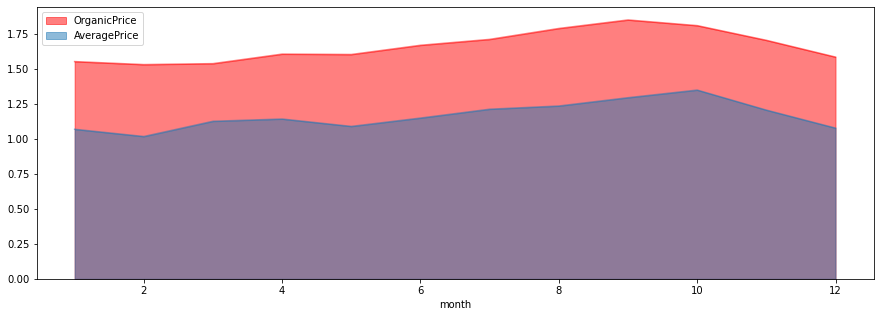

In [15]:
ax = average_price_organic_seasonality.groupby('month').aggregate('mean').plot.area(stacked = False, color = 'r')
average_price_conventional_seasonality.groupby('month').aggregate('mean').plot.area(ax = ax, stacked = False, figsize=(15,5));

A slight peak is observable for both organic and conventaional avocados in autumn (september for organic and october for conventional). 

## Geographical dependency TODO

In [16]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Whole data period
**TO DO**
* first mean then plot like on the bottom

In [17]:
average_price_wholeperiod = avocado.loc[:,['AveragePrice','type', 'region']]
average_price_wholeperiod

,AveragePrice,type,region
0,1.33,conventional,Albany
1,1.35,conventional,Albany
2,0.93,conventional,Albany
3,1.08,conventional,Albany
4,1.28,conventional,Albany
...,...,...,...
18244,1.63,organic,WestTexNewMexico
18245,1.71,organic,WestTexNewMexico
18246,1.87,organic,WestTexNewMexico
18247,1.93,organic,WestTexNewMexico


In [18]:
# selecting organic values
average_price_organic_wholeperiod = average_price_wholeperiod[average_price_wholeperiod['type'] == 'organic']
average_price_organic_wholeperiod = average_price_organic_wholeperiod.rename(columns = {'AveragePrice':'OrganicPrice'}).copy()

In [19]:
# selecting conventional values
average_price_conventional_wholeperiod = average_price_wholeperiod[average_price_wholeperiod['type'] == 'conventional']
average_price_conventional_wholeperiod = average_price_conventional_wholeperiod.rename(columns = {'AveragePrice':'ConventionalPrice'}).copy()

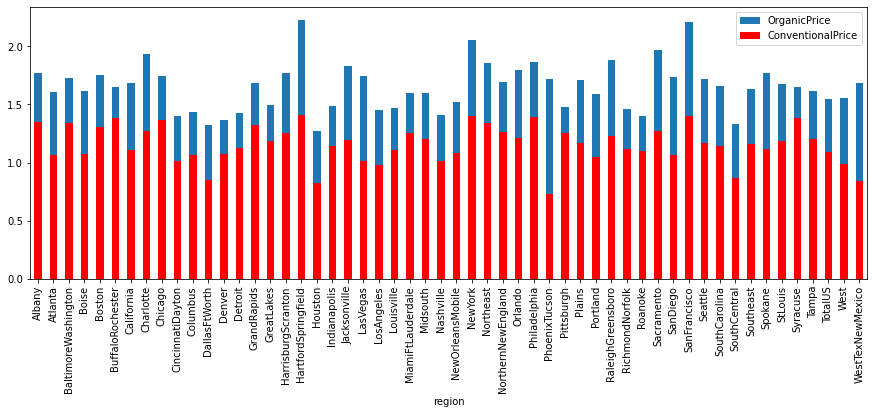

In [20]:
ax = average_price_organic_wholeperiod.groupby('region').aggregate('mean').plot(kind='bar')
average_price_conventional_wholeperiod.groupby('region').aggregate('mean').plot(ax = ax, figsize=(15,5), kind='bar', color = 'r');

### Last year

In [21]:
avocado['Date'].max()

'2018-03-25'

In [22]:
average_price_lastyear = avocado[avocado['Date'] > '2017-03-25']
average_price_lastyear.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5616,0,2017-12-31,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.0,conventional,2017,Albany
5617,1,2017-12-24,1.45,77039.09,2811.71,58592.23,19.06,15616.09,6863.18,8752.91,0.0,conventional,2017,Albany
5618,2,2017-12-17,1.43,70677.56,2578.95,50811.52,79.18,17207.91,8914.13,8293.78,0.0,conventional,2017,Albany
5619,3,2017-12-10,1.29,92325.53,3220.05,75147.56,104.36,13853.56,7268.21,6585.35,0.0,conventional,2017,Albany
5620,4,2017-12-03,1.39,139970.00,3772.00,126551.00,136.00,9511.00,7061.00,2450.00,0.0,conventional,2017,Albany


In [23]:
average_price_lastyear = average_price_lastyear.loc[:,['AveragePrice','type', 'region']]
average_price_lastyear.head()

,AveragePrice,type,region
5616,1.47,conventional,Albany
5617,1.45,conventional,Albany
5618,1.43,conventional,Albany
5619,1.29,conventional,Albany
5620,1.39,conventional,Albany


In [24]:
# selecting organic values
average_price_organic_lastyear = average_price_lastyear[average_price_lastyear['type'] == 'organic']
average_price_organic_lastyear = average_price_organic_lastyear.rename(columns = {'AveragePrice':'OrganicPrice'}).copy()

In [25]:
# selecting conventional values
average_price_conventional_lastyear = average_price_lastyear[average_price_lastyear['type'] == 'conventional']
average_price_conventional_lastyear = average_price_conventional_lastyear.rename(columns = {'AveragePrice':'ConventionalPrice'}).copy()

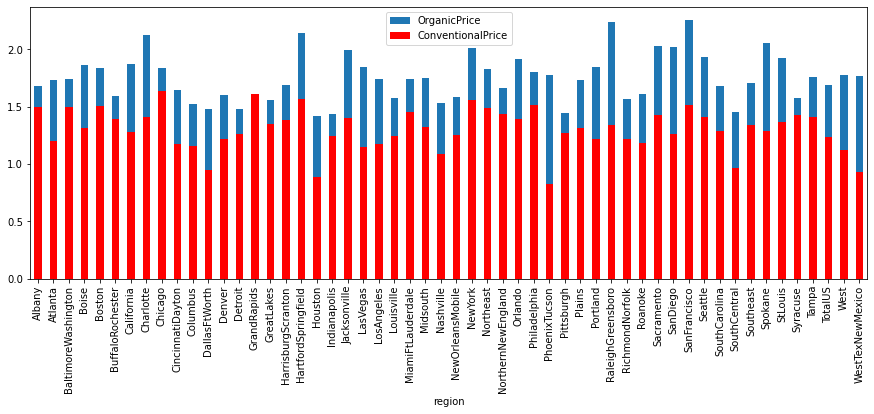

In [26]:
ax = average_price_organic_lastyear.groupby('region').aggregate('mean').plot(kind='bar')
average_price_conventional_lastyear.groupby('region').aggregate('mean').plot(ax = ax, figsize=(15,5), kind='bar', color = 'r');

#### First mean than plot

In [27]:
df = average_price_organic_lastyear.groupby('region').aggregate('mean')
df.head()

,OrganicPrice
region,
Albany,1.682264
Atlanta,1.734717
BaltimoreWashington,1.742075
Boise,1.866792
Boston,1.836981


In [28]:
df['ConventionalPrice'] = average_price_conventional_lastyear.groupby('region').aggregate('mean').sort_values(by =['ConventionalPrice'])
df

,OrganicPrice,ConventionalPrice
region,,
Albany,1.682264,1.495283
Atlanta,1.734717,1.203019
BaltimoreWashington,1.742075,1.494717
Boise,1.866792,1.311698
Boston,1.836981,1.504906
BuffaloRochester,1.597925,1.389245
California,1.872075,1.280943
Charlotte,2.128868,1.412642
Chicago,1.838868,1.637925


In [29]:
cheapest_organic = df.nsmallest(5, 'OrganicPrice')
cheapest_organic

,OrganicPrice,ConventionalPrice
region,,
Houston,1.421887,0.890943
Indianapolis,1.438491,1.242453
Pittsburgh,1.443396,1.268491
SouthCentral,1.451321,0.962642
DallasFtWorth,1.479811,0.946604


In [30]:
cheapest_conventional = df.nsmallest(5, 'ConventionalPrice')
cheapest_conventional

,OrganicPrice,ConventionalPrice
region,,
PhoenixTucson,1.779623,0.824528
Houston,1.421887,0.890943
WestTexNewMexico,1.771961,0.928868
DallasFtWorth,1.479811,0.946604
SouthCentral,1.451321,0.962642


In [31]:
idx_organic = cheapest_organic.index
idx_organic

Index(['Houston', 'Indianapolis', 'Pittsburgh', 'SouthCentral',
       'DallasFtWorth'],
      dtype='object', name='region')

In [32]:
idx_conventional = cheapest_conventional.index
idx_conventional

Index(['PhoenixTucson', 'Houston', 'WestTexNewMexico', 'DallasFtWorth',
       'SouthCentral'],
      dtype='object', name='region')

In [33]:
idx_organic.intersection(idx_conventional)

Index(['Houston', 'SouthCentral', 'DallasFtWorth'], dtype='object', name='region')

**Conclusion** Within the last year of data, the cheapest locations were Houston, South Central and DallasFtWorth. 